## CAPSTONE PROJECT  WEBSITE BEHAVIOUR ANALYSIS

In [392]:
import matplotlib.pyplot as plt
import seaborn as sns

In [393]:
import warnings
warnings.filterwarnings('ignore')

In [394]:
import numpy as np
import pandas as pd

In [395]:
ecom=pd.read_csv("Problem2_Site_BrowingBehavior.csv", delimiter='\t') 
ecom.head()

,2017-07-26 00:01:40.965,0,product
0,2017-07-26 00:03:18.448,0,product
1,2017-07-26 00:36:59.028,0,default
2,2017-07-26 00:41:17.273,0,product-listing-category
3,2017-07-26 00:45:39.197,0,content
4,2017-07-26 00:45:48.487,0,home


In [396]:
ecom.columns=['Timestamp','User_id','Website_section_visited']

In [397]:
ecom

,Timestamp,User_id,Website_section_visited
0,2017-07-26 00:03:18.448,0,product
1,2017-07-26 00:36:59.028,0,default
2,2017-07-26 00:41:17.273,0,product-listing-category
3,2017-07-26 00:45:39.197,0,content
4,2017-07-26 00:45:48.487,0,home
...,...,...,...
5535918,2017-07-26 23:18:53.789,9221827579306644828,iroa
5535919,2017-07-26 23:19:03.394,9221827579306644828,iroa
5535920,2017-07-26 23:19:11.569,9221827579306644828,product
5535921,2017-07-26 23:21:56.085,9221827579306644828,product


In [398]:
ecom.shape

(5535923, 3)

In [399]:
ecom.describe()

,User_id
count,5.535923e+06
mean,3.441115e+18
std,3.054992e+18
min,0.000000e+00
25%,0.000000e+00
50%,3.038650e+18
75%,6.135811e+18
max,9.223368e+18


In [400]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535923 entries, 0 to 5535922
Data columns (total 3 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Timestamp                object
 1   User_id                  int64 
 2   Website_section_visited  object
dtypes: int64(1), object(2)
memory usage: 126.7+ MB


In [401]:
ecom1=pd.read_csv("Problem2_FInalConversions.csv", delimiter='\t') 
ecom1.head()

,2017-07-26 00:00:10.465,0,A293532,52.14
0,2017-07-26 00:00:12.301,0,H209597,31.50
1,2017-07-26 00:00:12.388,0,H211370,30.48
2,2017-07-26 00:00:14.389,0,A282331,51.00
3,2017-07-26 00:00:16.837,0,H211410,16.74
4,2017-07-26 00:00:19.625,0,H211801,34.35


In [402]:
ecom1.columns=["Timestamp","User_id","Products_purchased","OverAllCartValue"]
ecom1.head()

,Timestamp,User_id,Products_purchased,OverAllCartValue
0,2017-07-26 00:00:12.301,0,H209597,31.50
1,2017-07-26 00:00:12.388,0,H211370,30.48
2,2017-07-26 00:00:14.389,0,A282331,51.00
3,2017-07-26 00:00:16.837,0,H211410,16.74
4,2017-07-26 00:00:19.625,0,H211801,34.35


In [403]:
ecom1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79794 entries, 0 to 79793
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           79794 non-null  object 
 1   User_id             79794 non-null  int64  
 2   Products_purchased  79794 non-null  object 
 3   OverAllCartValue    79794 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [404]:
ecom1.shape

(79794, 4)

In [405]:
ecom1.isnull().sum()

Timestamp             0
User_id               0
Products_purchased    0
OverAllCartValue      0
dtype: int64

In [406]:
final_ecom=pd.merge(ecom,ecom1,on=['Timestamp','User_id'], how='right')
final_ecom

,Timestamp,User_id,Website_section_visited,Products_purchased,OverAllCartValue
0,2017-07-26 00:00:12.301,0,product-listing-category,H209597,31.50
1,2017-07-26 00:00:12.301,0,product-listing-category,H209597,31.50
2,2017-07-26 00:00:12.301,0,product-listing-search,H209597,31.50
3,2017-07-26 00:00:12.388,0,NaN,H211370,30.48
4,2017-07-26 00:00:14.389,0,NaN,A282331,51.00
...,...,...,...,...,...
80014,2017-07-26 23:09:08.202,9174973170462435039,NaN,K45766,89.96
80015,2017-07-26 23:44:19.505,9179943977593655876,NaN,V34738,24.66
80016,2017-07-26 23:53:15.661,9179943977593655876,NaN,H210000,21.64
80017,2017-07-26 23:13:02.55,9211905364441411643,NaN,A209343,73.00


In [407]:
final_ecom.drop_duplicates(inplace=True)
final_ecom.shape

(79877, 5)

In [408]:
final_ecom.head()

,Timestamp,User_id,Website_section_visited,Products_purchased,OverAllCartValue
0,2017-07-26 00:00:12.301,0,product-listing-category,H209597,31.50
2,2017-07-26 00:00:12.301,0,product-listing-search,H209597,31.50
3,2017-07-26 00:00:12.388,0,NaN,H211370,30.48
4,2017-07-26 00:00:14.389,0,NaN,A282331,51.00
5,2017-07-26 00:00:16.837,0,NaN,H211410,16.74


In [409]:
final_ecom.reset_index(drop=True)

,Timestamp,User_id,Website_section_visited,Products_purchased,OverAllCartValue
0,2017-07-26 00:00:12.301,0,product-listing-category,H209597,31.50
1,2017-07-26 00:00:12.301,0,product-listing-search,H209597,31.50
2,2017-07-26 00:00:12.388,0,NaN,H211370,30.48
3,2017-07-26 00:00:14.389,0,NaN,A282331,51.00
4,2017-07-26 00:00:16.837,0,NaN,H211410,16.74
...,...,...,...,...,...
79872,2017-07-26 23:09:08.202,9174973170462435039,NaN,K45766,89.96
79873,2017-07-26 23:44:19.505,9179943977593655876,NaN,V34738,24.66
79874,2017-07-26 23:53:15.661,9179943977593655876,NaN,H210000,21.64
79875,2017-07-26 23:13:02.55,9211905364441411643,NaN,A209343,73.00


## VISUALISING THE DATA

In [410]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualising Numeric Variables, Let's make a pairplot of all the numeric variables.
Checking the relationship between User_id and OverAllCartValue

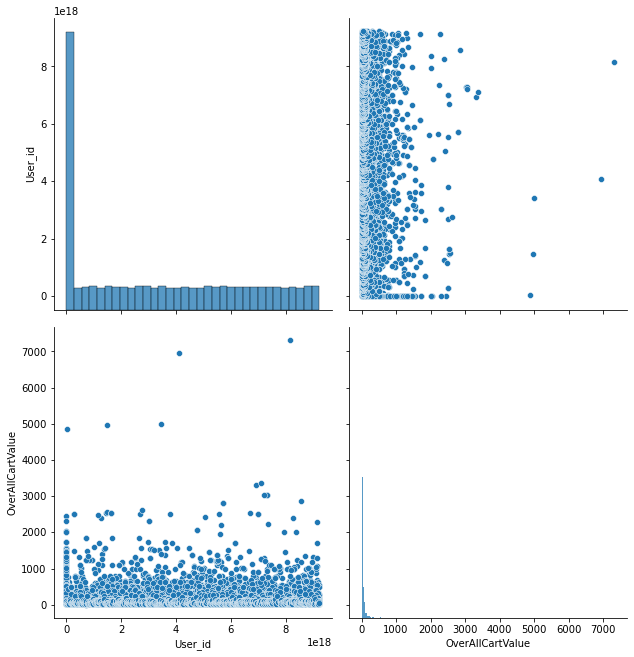

In [411]:
sns.pairplot(final_ecom).fig.set_size_inches(10,10)
plt.show()

Visualising Categorical Variables


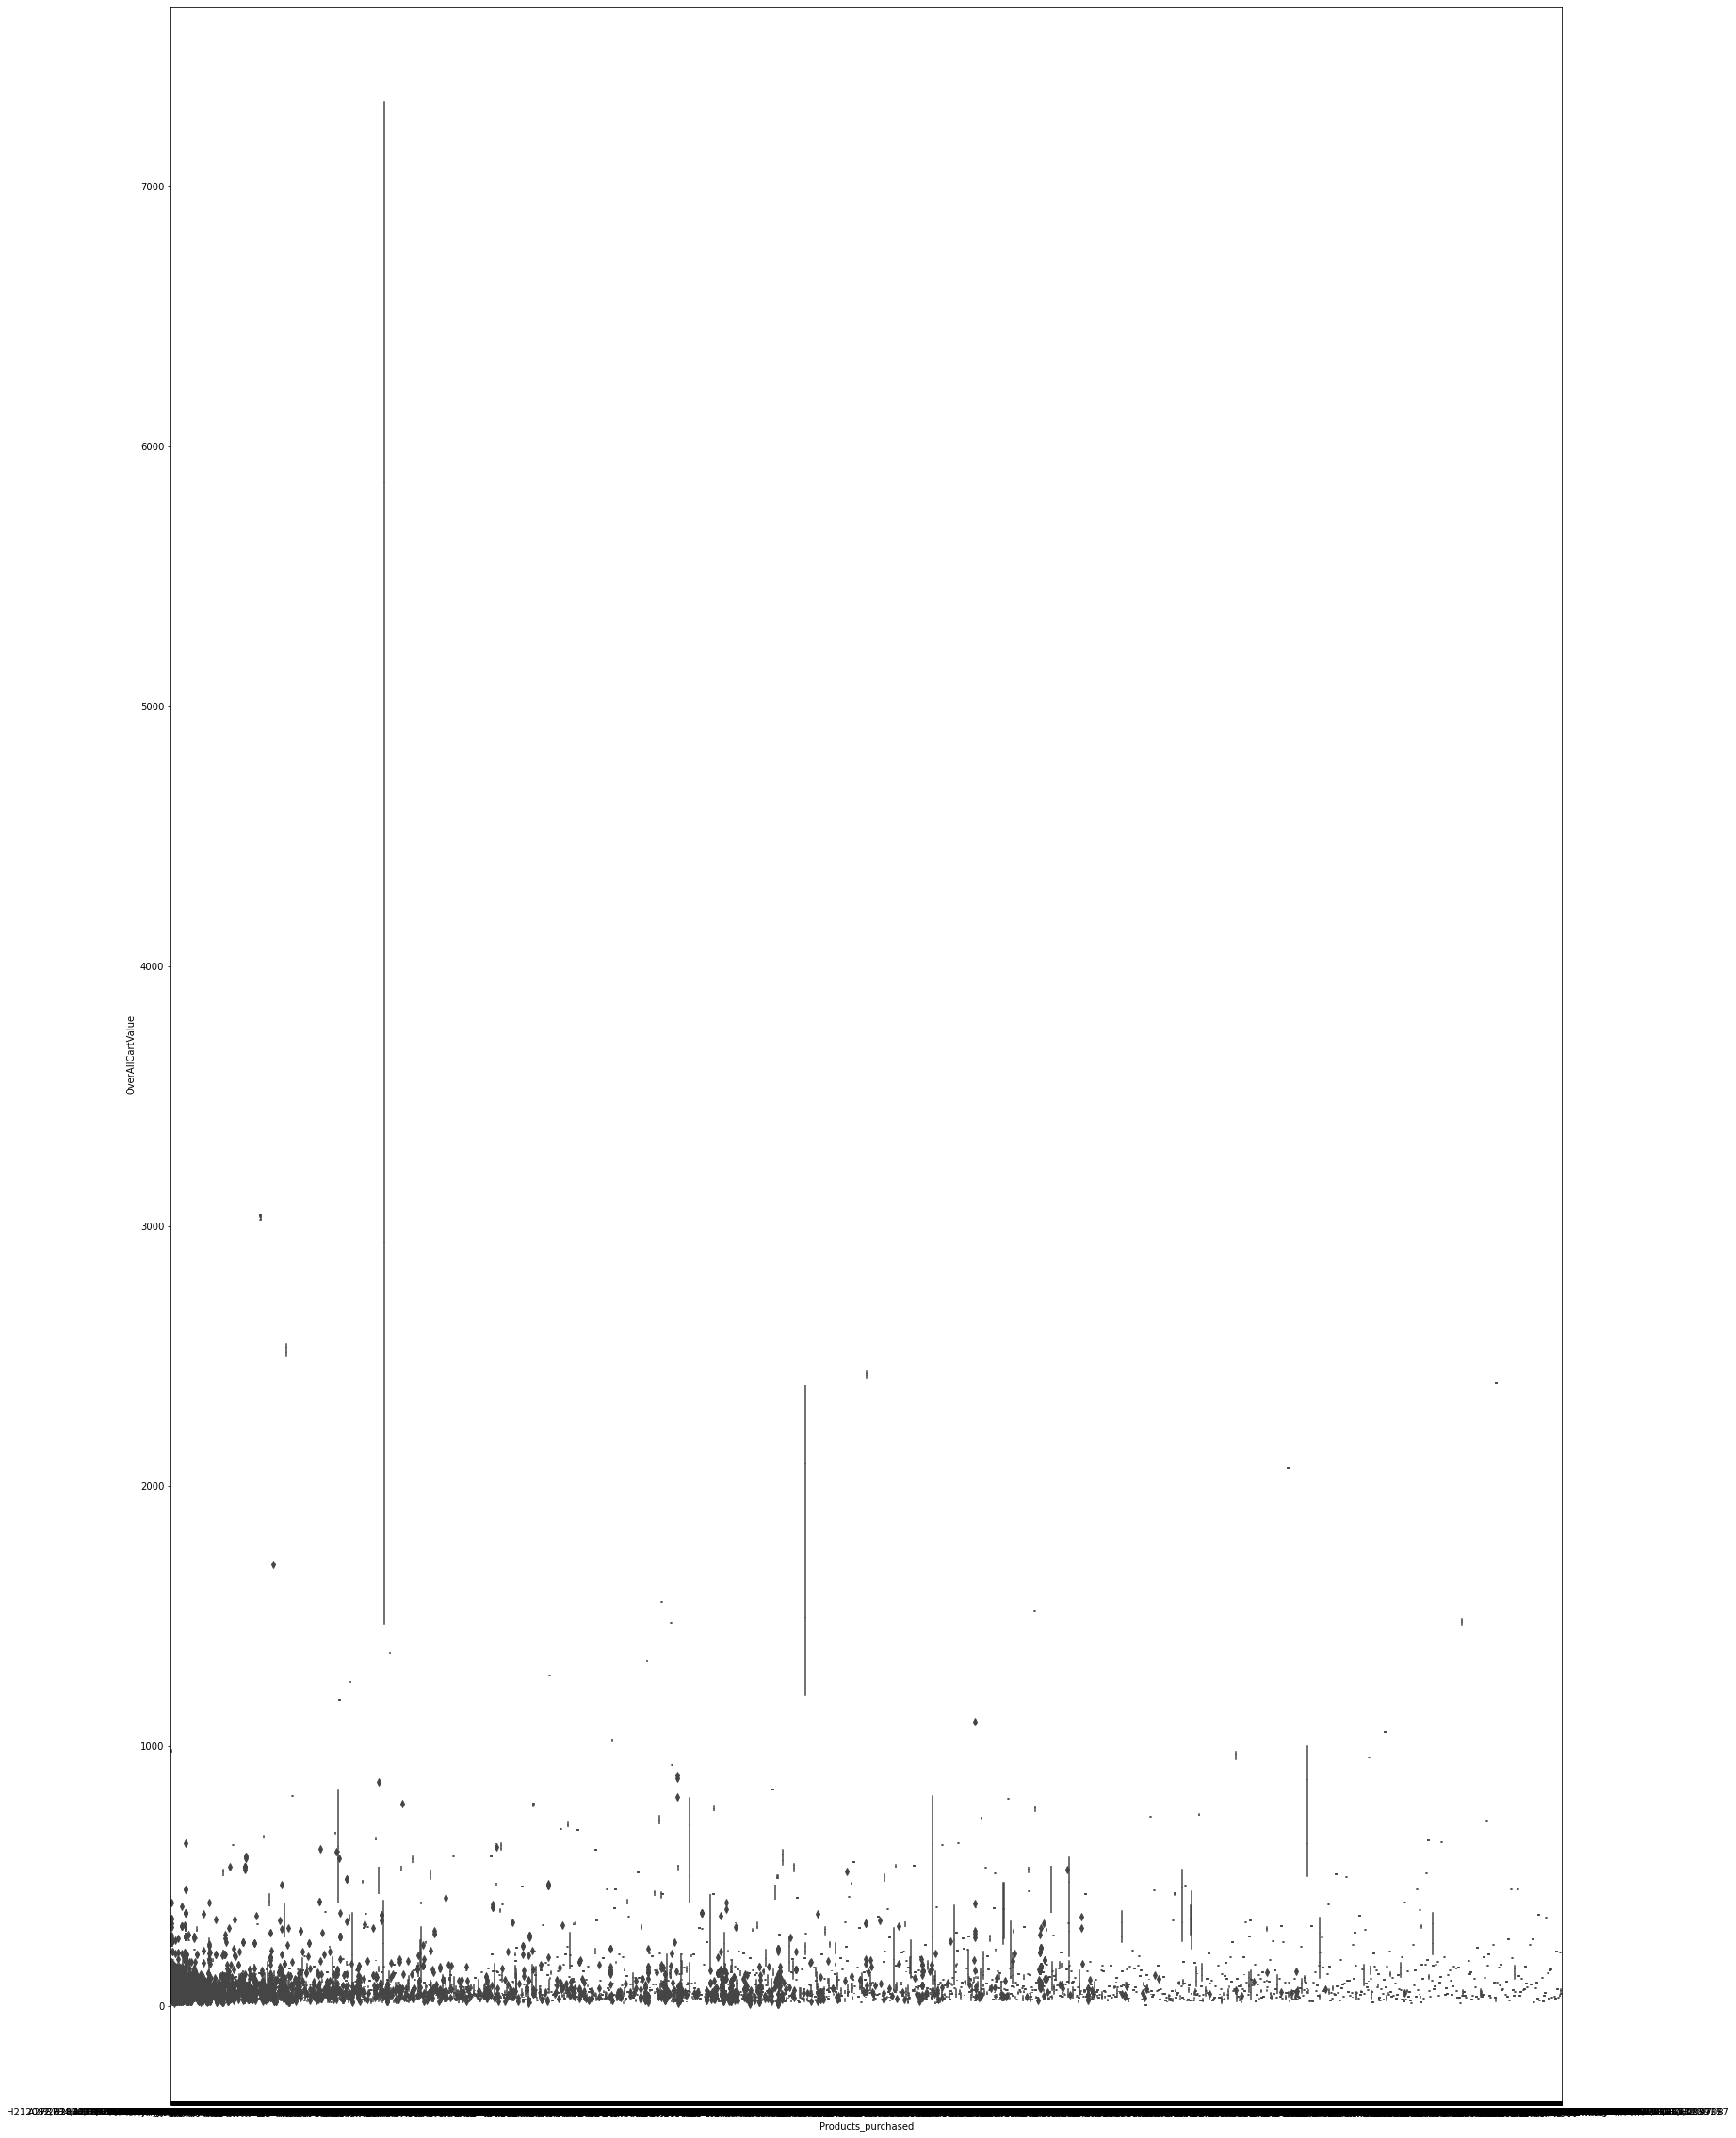

In [21]:
# Relationship between Products_purchased and OverAllCartValue

plt.figure(figsize=(90, 30))
plt.subplot(2,3,1)
sns.boxplot(x = 'Products_purchased', y = 'OverAllCartValue', data = final_ecom)
plt.show()

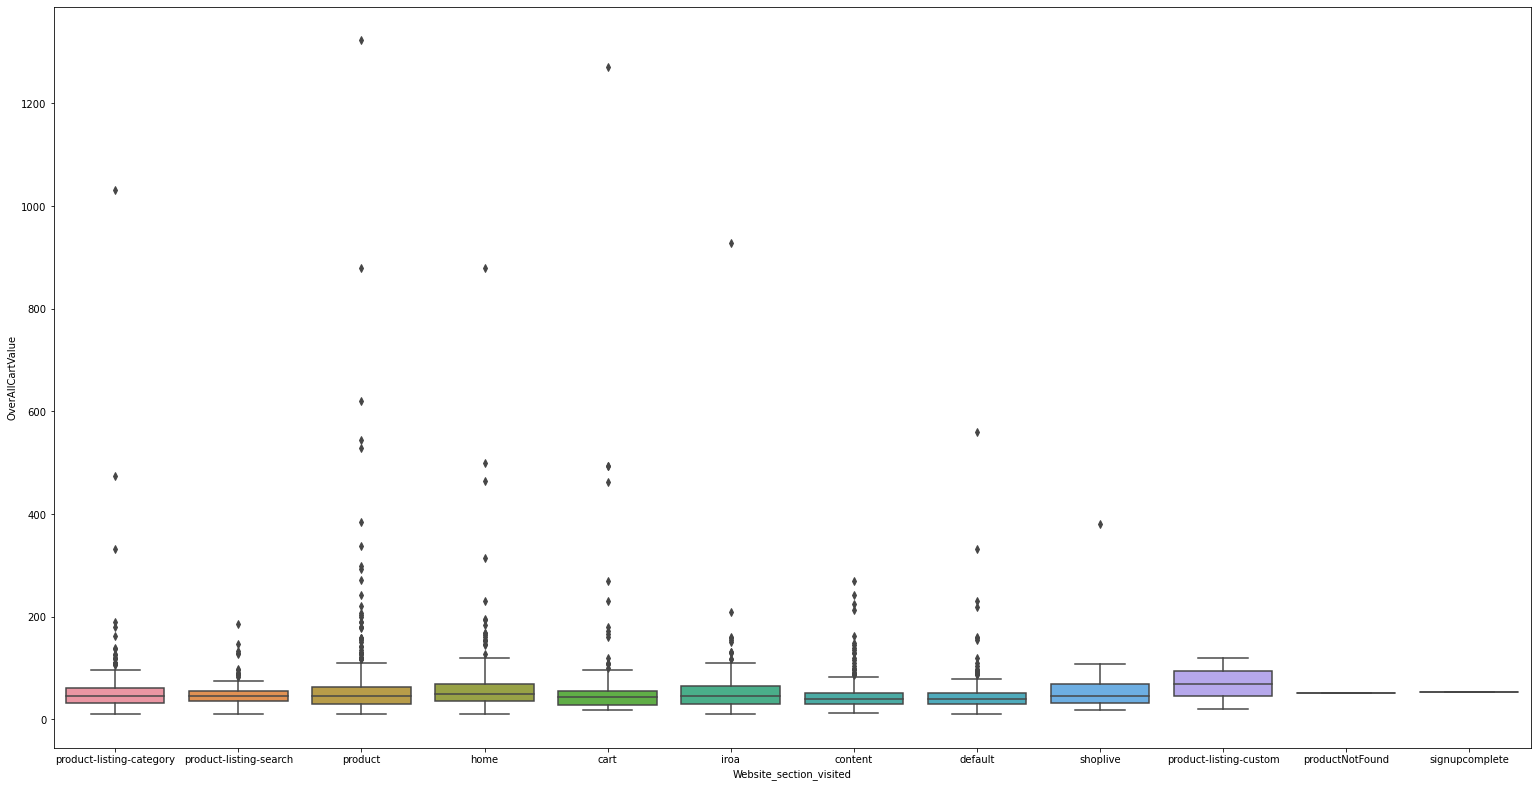

In [22]:
# Relationship between Website_section_visited and OverAllCartValue

plt.figure(figsize=(90, 30))
plt.subplot(2,3,1)
sns.boxplot(x = 'Website_section_visited', y = 'OverAllCartValue', data = final_ecom)
plt.show()

Trying to divide the website section visited , to binary no.s .. let's see
DUMMY VARIABLES

In [412]:
status = pd.get_dummies(final_ecom['Website_section_visited'])

In [413]:
status

,cart,content,default,home,iroa,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete
0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
80014,0,0,0,0,0,0,0,0,0,0,0,0
80015,0,0,0,0,0,0,0,0,0,0,0,0
80016,0,0,0,0,0,0,0,0,0,0,0,0
80017,0,0,0,0,0,0,0,0,0,0,0,0


In [414]:
# Let's drop the first column i.e. Website_section_visited from status df using 'drop_first = True'

status= pd.get_dummies(final_ecom['Website_section_visited'], drop_first = True)
status

,content,default,home,iroa,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete
0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
80014,0,0,0,0,0,0,0,0,0,0,0
80015,0,0,0,0,0,0,0,0,0,0,0
80016,0,0,0,0,0,0,0,0,0,0,0
80017,0,0,0,0,0,0,0,0,0,0,0


In [415]:
# Add the results to the original housing dataframe

final_ecom = pd.concat([final_ecom, status], axis = 1)

In [416]:
# Now let's see the head of our dataframe.

final_ecom.reset_index(drop=True)

,Timestamp,User_id,Website_section_visited,Products_purchased,OverAllCartValue,content,default,home,iroa,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete
0,2017-07-26 00:00:12.301,0,product-listing-category,H209597,31.50,0,0,0,0,0,1,0,0,0,0,0
1,2017-07-26 00:00:12.301,0,product-listing-search,H209597,31.50,0,0,0,0,0,0,0,1,0,0,0
2,2017-07-26 00:00:12.388,0,NaN,H211370,30.48,0,0,0,0,0,0,0,0,0,0,0
3,2017-07-26 00:00:14.389,0,NaN,A282331,51.00,0,0,0,0,0,0,0,0,0,0,0
4,2017-07-26 00:00:16.837,0,NaN,H211410,16.74,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79872,2017-07-26 23:09:08.202,9174973170462435039,NaN,K45766,89.96,0,0,0,0,0,0,0,0,0,0,0
79873,2017-07-26 23:44:19.505,9179943977593655876,NaN,V34738,24.66,0,0,0,0,0,0,0,0,0,0,0
79874,2017-07-26 23:53:15.661,9179943977593655876,NaN,H210000,21.64,0,0,0,0,0,0,0,0,0,0,0
79875,2017-07-26 23:13:02.55,9211905364441411643,NaN,A209343,73.00,0,0,0,0,0,0,0,0,0,0,0


In [417]:
df=final_ecom[['User_id', 'Timestamp','Products_purchased']]
df               

,User_id,Timestamp,Products_purchased
0,0,2017-07-26 00:00:12.301,H209597
2,0,2017-07-26 00:00:12.301,H209597
3,0,2017-07-26 00:00:12.388,H211370
4,0,2017-07-26 00:00:14.389,A282331
5,0,2017-07-26 00:00:16.837,H211410
...,...,...,...
80014,9174973170462435039,2017-07-26 23:09:08.202,K45766
80015,9179943977593655876,2017-07-26 23:44:19.505,V34738
80016,9179943977593655876,2017-07-26 23:53:15.661,H210000
80017,9211905364441411643,2017-07-26 23:13:02.55,A209343


In [418]:
# trying to check, which sections of the website were visited by a user and how many times.
wsv=final_ecom.groupby(['User_id'])['Website_section_visited'].count()
wsv

User_id
0                      2085
2941287703                0
71023925710020            0
394529638495081           0
430191686443660           0
                       ... 
9222344977727669611       0
9222827786235385211       0
9222849861047010228       0
9223093682582171386       0
9223308018930726010       0
Name: Website_section_visited, Length: 41009, dtype: int64

In [419]:
# Drop 'Website_Section_visited' as we have created the dummies for it

final_ecom.drop(['Website_section_visited'], axis = 1, inplace = True)

In [420]:
final_ecom.reset_index(drop=True)

,Timestamp,User_id,Products_purchased,OverAllCartValue,content,default,home,iroa,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete
0,2017-07-26 00:00:12.301,0,H209597,31.50,0,0,0,0,0,1,0,0,0,0,0
1,2017-07-26 00:00:12.301,0,H209597,31.50,0,0,0,0,0,0,0,1,0,0,0
2,2017-07-26 00:00:12.388,0,H211370,30.48,0,0,0,0,0,0,0,0,0,0,0
3,2017-07-26 00:00:14.389,0,A282331,51.00,0,0,0,0,0,0,0,0,0,0,0
4,2017-07-26 00:00:16.837,0,H211410,16.74,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79872,2017-07-26 23:09:08.202,9174973170462435039,K45766,89.96,0,0,0,0,0,0,0,0,0,0,0
79873,2017-07-26 23:44:19.505,9179943977593655876,V34738,24.66,0,0,0,0,0,0,0,0,0,0,0
79874,2017-07-26 23:53:15.661,9179943977593655876,H210000,21.64,0,0,0,0,0,0,0,0,0,0,0
79875,2017-07-26 23:13:02.55,9211905364441411643,A209343,73.00,0,0,0,0,0,0,0,0,0,0,0


### BELOW WE ARE ABLE TO SEE HOW MANY PRODUCTS WERE PURCHASED BY EACH USER_ID

In [421]:
# TRYING TO GROUP BY PRODUCT PURCHASED, USER_ID.. JUST TO CHECK IF WE CAN , CATEGORISE PRODUCTS_PURCHASED OR NOT

             
df1=final_ecom[['User_id', 'Products_purchased','Timestamp','OverAllCartValue']]

In [422]:
#df1.groupby('User_id').count()

pp=df1.groupby(['User_id'])['Timestamp','Products_purchased','OverAllCartValue'].count()
pp


,Timestamp,Products_purchased,OverAllCartValue
User_id,,,
0,20368,20368,20368
2941287703,1,1,1
71023925710020,1,1,1
394529638495081,1,1,1
430191686443660,2,2,2
...,...,...,...
9222344977727669611,1,1,1
9222827786235385211,1,1,1
9222849861047010228,1,1,1


### Now we will try to  Connect User_id,Website_section_visited , Number of Times and Products_purchased/OverAllCartValue

In [423]:
final_ecom1=pd.merge(wsv,pp,on=['User_id'], how='right')
final_ecom1

,Website_section_visited,Timestamp,Products_purchased,OverAllCartValue
User_id,,,,
0,2085,20368,20368,20368
2941287703,0,1,1,1
71023925710020,0,1,1,1
394529638495081,0,1,1,1
430191686443660,0,2,2,2
...,...,...,...,...
9222344977727669611,0,1,1,1
9222827786235385211,0,1,1,1
9222849861047010228,0,1,1,1


In [424]:
final_ecom1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41009 entries, 0 to 9223308018930726010
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Website_section_visited  41009 non-null  int64
 1   Timestamp                41009 non-null  int64
 2   Products_purchased       41009 non-null  int64
 3   OverAllCartValue         41009 non-null  int64
dtypes: int64(4)
memory usage: 1.6 MB


### Visualising the relationship between No. of Times visited with Products_purchased, as per the USER_ID
### This is the first problem statement.

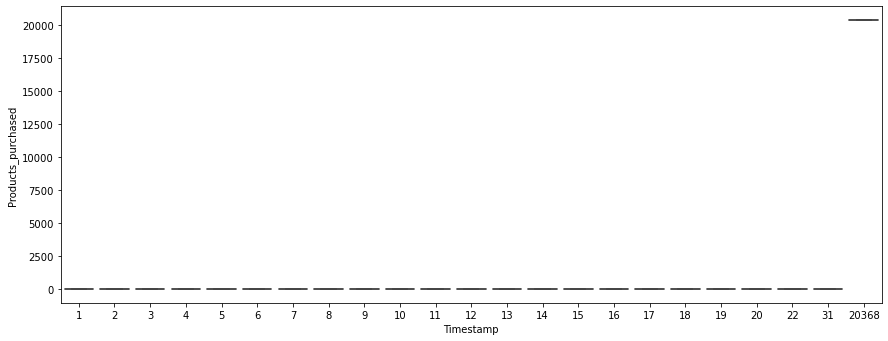

In [425]:
plt.figure(figsize=(50, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Timestamp', y = 'Products_purchased', data = final_ecom1)
plt.show()

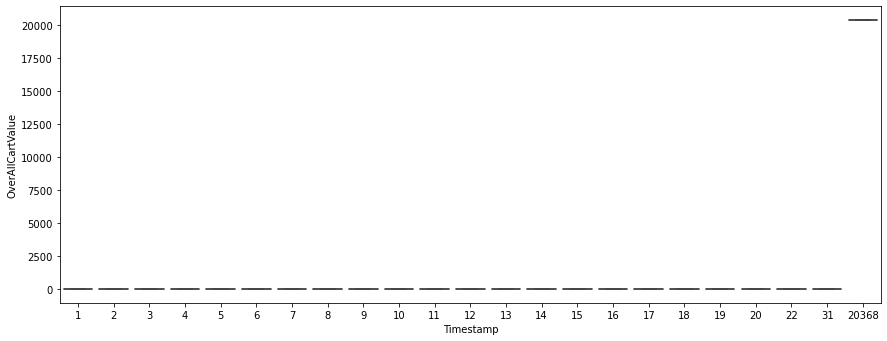

In [426]:
# Also checking the relationship between 'Timestamp' and 'OverAllCartValue'
plt.figure(figsize=(50, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Timestamp', y = 'OverAllCartValue', data = final_ecom1)
plt.show()

(array([4.1008e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  208.5,  417. ,  625.5,  834. , 1042.5, 1251. , 1459.5,
        1668. , 1876.5, 2085. ]),
 <BarContainer object of 10 artists>)

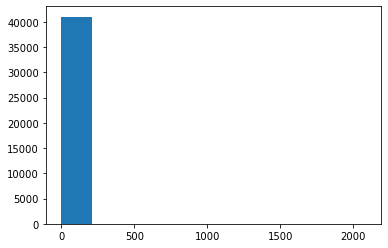

In [427]:
plt.hist(final_ecom1['Website_section_visited'])

(array([4.1008e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00]),
 array([1.00000e+00, 3.39550e+03, 6.79000e+03, 1.01845e+04, 1.35790e+04,
        1.69735e+04, 2.03680e+04]),
 <BarContainer object of 6 artists>)

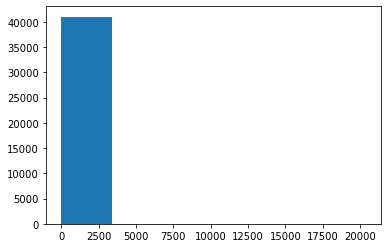

In [428]:
plt.hist(final_ecom1['Products_purchased'], bins=6)

(array([4.1008e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00]),
 array([1.00000e+00, 3.39550e+03, 6.79000e+03, 1.01845e+04, 1.35790e+04,
        1.69735e+04, 2.03680e+04]),
 <BarContainer object of 6 artists>)

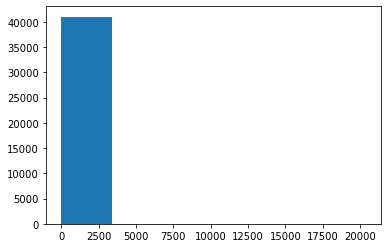

In [429]:
plt.hist(final_ecom1['OverAllCartValue'], bins=6)

## Step 4: Splitting the Data into Training and Testing Sets

In [430]:
# TEST & TRAIN
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(final_ecom1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [431]:
df_train.head()

,Website_section_visited,Timestamp,Products_purchased,OverAllCartValue
User_id,,,,
7875129005403877330,0,1,1,1
5813914089058294418,0,1,1,1
5962835550562553448,0,1,1,1
3476445029083182143,0,2,2,2
2766452189529119335,0,1,1,1


In [432]:
df_train.describe()

,Website_section_visited,Timestamp,Products_purchased,OverAllCartValue
count,28706.000000,28706.000000,28706.000000,28706.000000
mean,0.072668,2.164112,2.164112,2.164112
std,12.306081,120.211923,120.211923,120.211923
min,0.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000
50%,0.000000,1.000000,1.000000,1.000000
75%,0.000000,2.000000,2.000000,2.000000
max,2085.000000,20368.000000,20368.000000,20368.000000


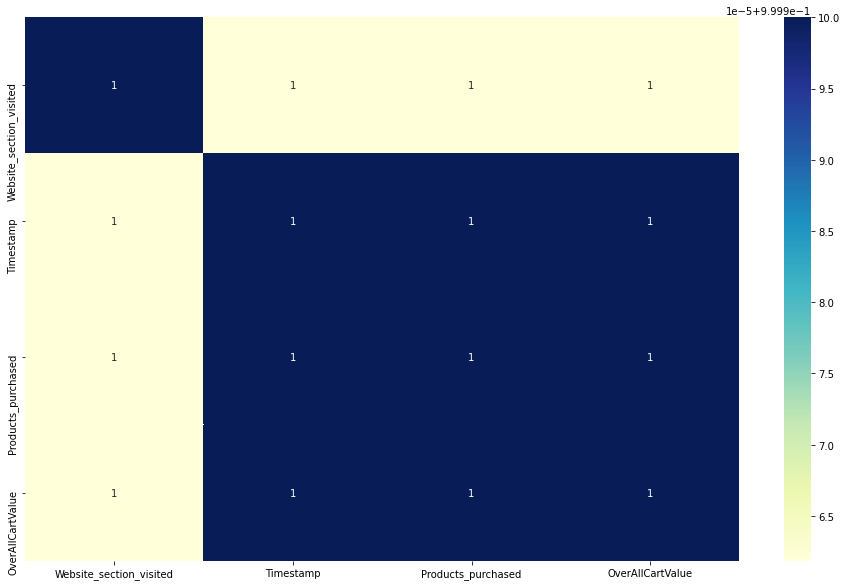

In [433]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

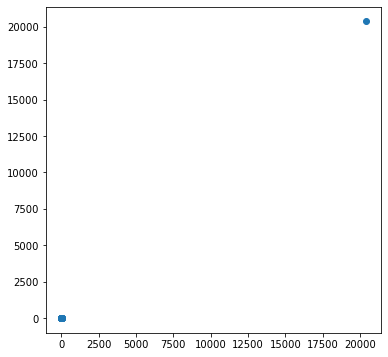

In [434]:
## Scatter plot representing Timestamp affecting Purchasing of products
plt.figure(figsize=[6,6])
plt.scatter(df_train.Timestamp, df_train.Products_purchased)
plt.show()

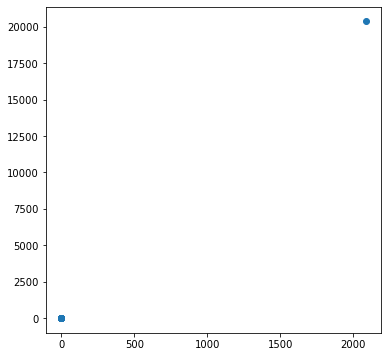

In [435]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.Website_section_visited, df_train.Products_purchased)
plt.show()

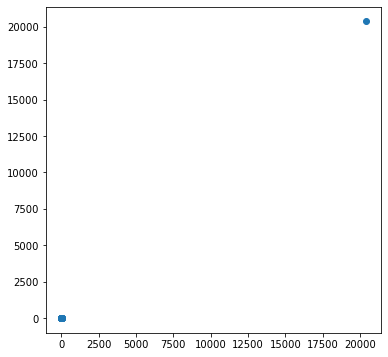

In [436]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.OverAllCartValue, df_train.Products_purchased)
plt.show()

In [437]:
##Dividing into X and Y sets for the model building
y_train = df_train.pop('Products_purchased')
X_train = df_train


## Step 5: Building a linear model

In [438]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['Timestamp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [439]:
lr.params

const       -1.268985e-13
Timestamp    1.000000e+00
dtype: float64

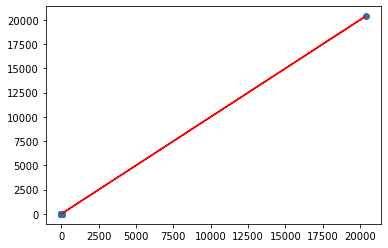

In [440]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -1.2689 + 1.000*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [441]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     Products_purchased   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.558e+30
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        12:02:17   Log-Likelihood:             6.7941e+05
No. Observations:               28706   AIC:                        -1.359e+06
Df Residuals:                   28704   BIC:                        -1.359e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.269e-13   7.52e-14     -1.688      0.0

In [467]:
## Adding other variable, OverAllCartValue

# Assign all the feature variables to X
#X_train_lm = X_train[['Timestamp','OverAllCartValue']]

In [468]:
# Build a linear model

#import statsmodels.api as sm
#X_train_lm = sm.add_constant(X_train_lm)

#lr_1 = sm.OLS(y_train, X_train_lm).fit()

#lr_1.params

const               1.489919e-13
Timestamp           2.793592e+00
OverAllCartValue   -1.793797e+00
dtype: float64

In [469]:
#print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:     Products_purchased   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.405e+11
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        12:16:55   Log-Likelihood:                 65530.
No. Observations:               28706   AIC:                        -1.311e+05
Df Residuals:                   28703   BIC:                        -1.310e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.49e-13      0.000  

After executing the above statement of linear regression gives following equation:
Product_purchased= 2.793 x Timestamp - 1.793 x OverAllCartValue

In [470]:
#X_train_lm = X_train[['Timestamp','OverAllCartValue','Website_section_visited']]

In [471]:
#import statsmodels.api as sm
#X_train_lm = sm.add_constant(X_train)

#lr_1 = sm.OLS(y_train, X_train_lm).fit()

#lr_1.params

const                      2.125557e-13
Website_section_visited    7.300827e-13
Timestamp                  3.526658e+00
OverAllCartValue          -2.526249e+00
dtype: float64

In [472]:
#print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:     Products_purchased   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.717e+10
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        12:20:25   Log-Likelihood:                 45741.
No. Observations:               28706   AIC:                        -9.147e+04
Df Residuals:                   28702   BIC:                        -9.144e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

After executing the above statement of linear regression gives following equation:
Product_purchased = 7.301 X Website_section_visited + 3.526 X Timestamp - 2.526  X OverAllCartValue

As we can see that OverAllCartValue, negatively the Purchasing of the products, (negative coeffecient)
Also, due to the reason of multi-collinearity, we must drop the OverAllCartValue.

In [473]:
#X = X_train.drop('OverAllCartValue', 1,)

In [474]:
# Build a third fitted model
#X_train_lm = sm.add_constant(X)

#lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [475]:
#print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:     Products_purchased   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.590e+29
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        12:23:20   Log-Likelihood:             6.6753e+05
No. Observations:               28706   AIC:                        -1.335e+06
Df Residuals:                   28703   BIC:                        -1.335e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

After executing the above statement of linear regression gives following equation:

Product_purchased = 1.04 x Website_Section_visited + 1 X Timestamp

Can be considered as well.

### Calculate the VIFs again for the new model

In [451]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1.0
1,Timestamp,1.0


### Step 6: Making Predictions Using the Final Model
### Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. second model.

Dividing into X_test and y_test

In [452]:
y_test1 = df_test.pop('Products_purchased')
X_test1 = df_test

In [453]:
X_test1

,Website_section_visited,Timestamp,OverAllCartValue
User_id,,,
5561924997883628788,0,1,1
8720550756461128407,0,1,1
7826643401988677359,0,1,1
2707379072536537785,0,1,1
7237600298871970825,0,1,1
...,...,...,...
6084139948065130131,0,1,1
8940183383693357550,0,1,1
3482427713814823025,0,1,1


In [454]:
# Adding constant variable to test dataframe
X_test_m1 = sm.add_constant(X_test1)

In [459]:
#X_test_m1 = X_test_m1.drop(["Website_section_visited"], axis = 1)
y_pred_m1 = lr.predict(X_test_m1)


In [460]:
y_pred_m1

User_id
5561924997883628788    1.0
8720550756461128407    1.0
7826643401988677359    1.0
2707379072536537785    1.0
7237600298871970825    1.0
                      ... 
6084139948065130131    1.0
8940183383693357550    1.0
3482427713814823025    1.0
5368519689184953369    1.0
2958709906513957604    1.0
Length: 12303, dtype: float64

## Step 7: Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

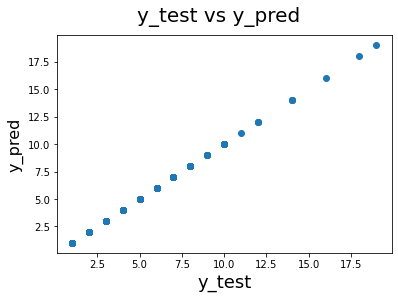

In [461]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test1, y_pred_m1)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

Products_purchased= 1 x Timestamp + (-1.268)
VIF - 1
P-value - 0
R-square - 1

DOES SATISFY THE ASSUMPTION.

-This shows that Timestamp works perfect in determining the Product_purchased.
- Also, in comments, I have tried to use both Website_section_visited and OverAllCartValue to check the manner of impact on    Product_purchase, but have found that
- while Website_Section_visited has a positively impact on the Purchasing of the Product.
-The CartValue Negatively impacts the Purchasing of the Product, so we dropped it.
(Although in order to find just the impact of how many times the website is visited is the problem statement, due to which,
I had to drop website_section_visited too.

With all the three features including the OverCartValue the overall
Equation would be: (can be checked by putting the values) But it would not satisfy the assumption. 


Product_purchased = 7.301 X Website_section_visited + 3.526 X Timestamp - 2.526 X OverAllCartValue
-DOESN'T SATISFY THE ASSUMPTION.

Overall we have a decent model, but we also acknowledge that we could do better.

Some more options can be:
We can also include Website_section_visited, as We will see further, that visiting different sections of the website , also affects the purchase of the product.
We should also try building a non-linear model.

## Assumptions
## Residual Analysis of the train data

In [462]:
y_train_pro = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

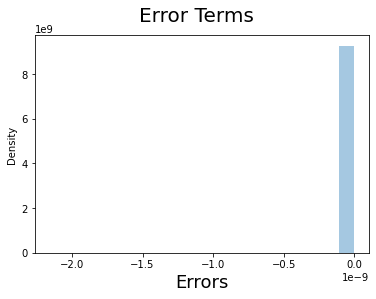

In [463]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train- y_train_pro), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Text(0.5, 0, 'Errors')

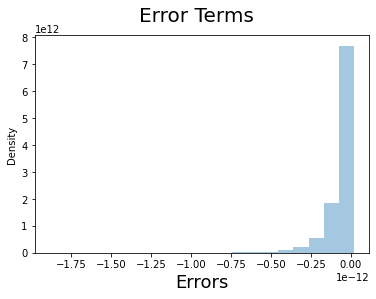

In [464]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test1-y_pred_m1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Homoscedasticity Assumption

<AxesSubplot:xlabel='Products_purchased'>

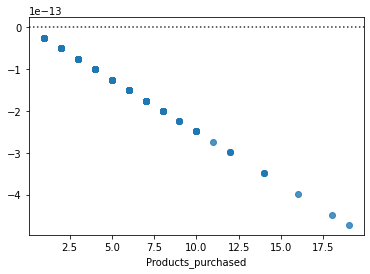

In [465]:
#on test data
sns.residplot(y_test1,y_pred_m1)

## No Autocorrelation of the Error Terms

In [466]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(y_test1-y_pred_m1)
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.9058434019605726
Little to no autocorrelation 

Assumption satisfied


### So, null hypothesis is false.
### That as the number of times the website is visited, can directly increase the number of products purchased by a user.

### final_ecom
### IN ORDER TO KNOW, WHICH SECTION OF THE WEBSITE IS REACHED and HOW DOES THAT DIRECTLY AFFECT THE PRODUCT PURCHASING
### Trying step 4 again.
### Step 4: Splitting the Data into Training and Testing Sets

In [172]:
# TEST & TRAIN
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(final_ecom, train_size = 0.7, test_size = 0.3, random_state = 100)

In [173]:
df_train.head()

,Timestamp,User_id,Products_purchased,OverAllCartValue,content,default,home,iroa,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete
7397,2017-07-26 01:03:44.502,8765298676695519850,H211405,31.32,0,0,0,0,0,0,0,0,0,0,0
57332,2017-07-26 19:24:36.299,3103341631710766016,K45766,89.96,0,0,0,0,0,0,0,0,0,0,0
45303,2017-07-26 18:01:14.558,0,A294720,46.98,0,0,0,0,0,0,0,0,0,0,0
16278,2017-07-26 00:16:29.587,8118245909121144583,"H211800,H211560",104.16,0,0,0,0,0,0,0,0,0,0,0
53509,2017-07-26 14:58:21.202,7949803911092848572,V34516,1999.00,0,0,0,0,0,0,0,0,0,0,0


In [174]:
df_train.describe()

,User_id,OverAllCartValue,content,default,home,iroa,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete
count,5.591300e+04,55913.000000,55913.000000,55913.000000,55913.000000,55913.000000,55913.000000,55913.000000,55913.000000,55913.000000,55913.000000,55913.000000,55913.0
mean,3.429922e+18,70.045092,0.002647,0.002558,0.003309,0.001967,0.008603,0.003684,0.000018,0.001252,0.000018,0.000179,0.0
std,3.048419e+18,120.447843,0.051381,0.050508,0.057427,0.044311,0.092351,0.060587,0.004229,0.035361,0.004229,0.013372,0.0
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000e+00,32.620000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,2.996365e+18,47.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,6.104096e+18,75.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,9.223308e+18,7324.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


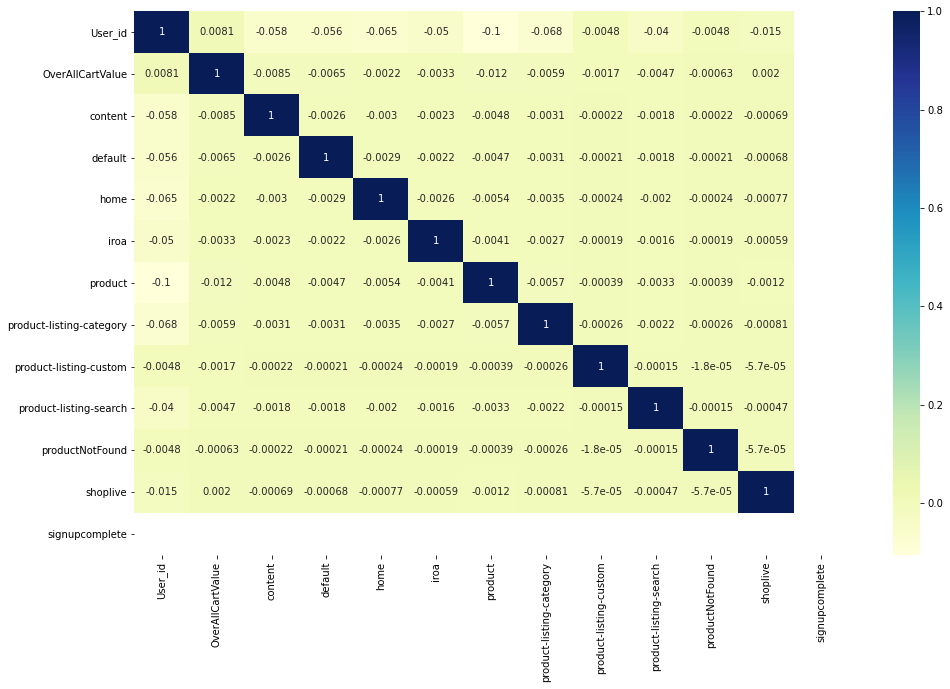

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

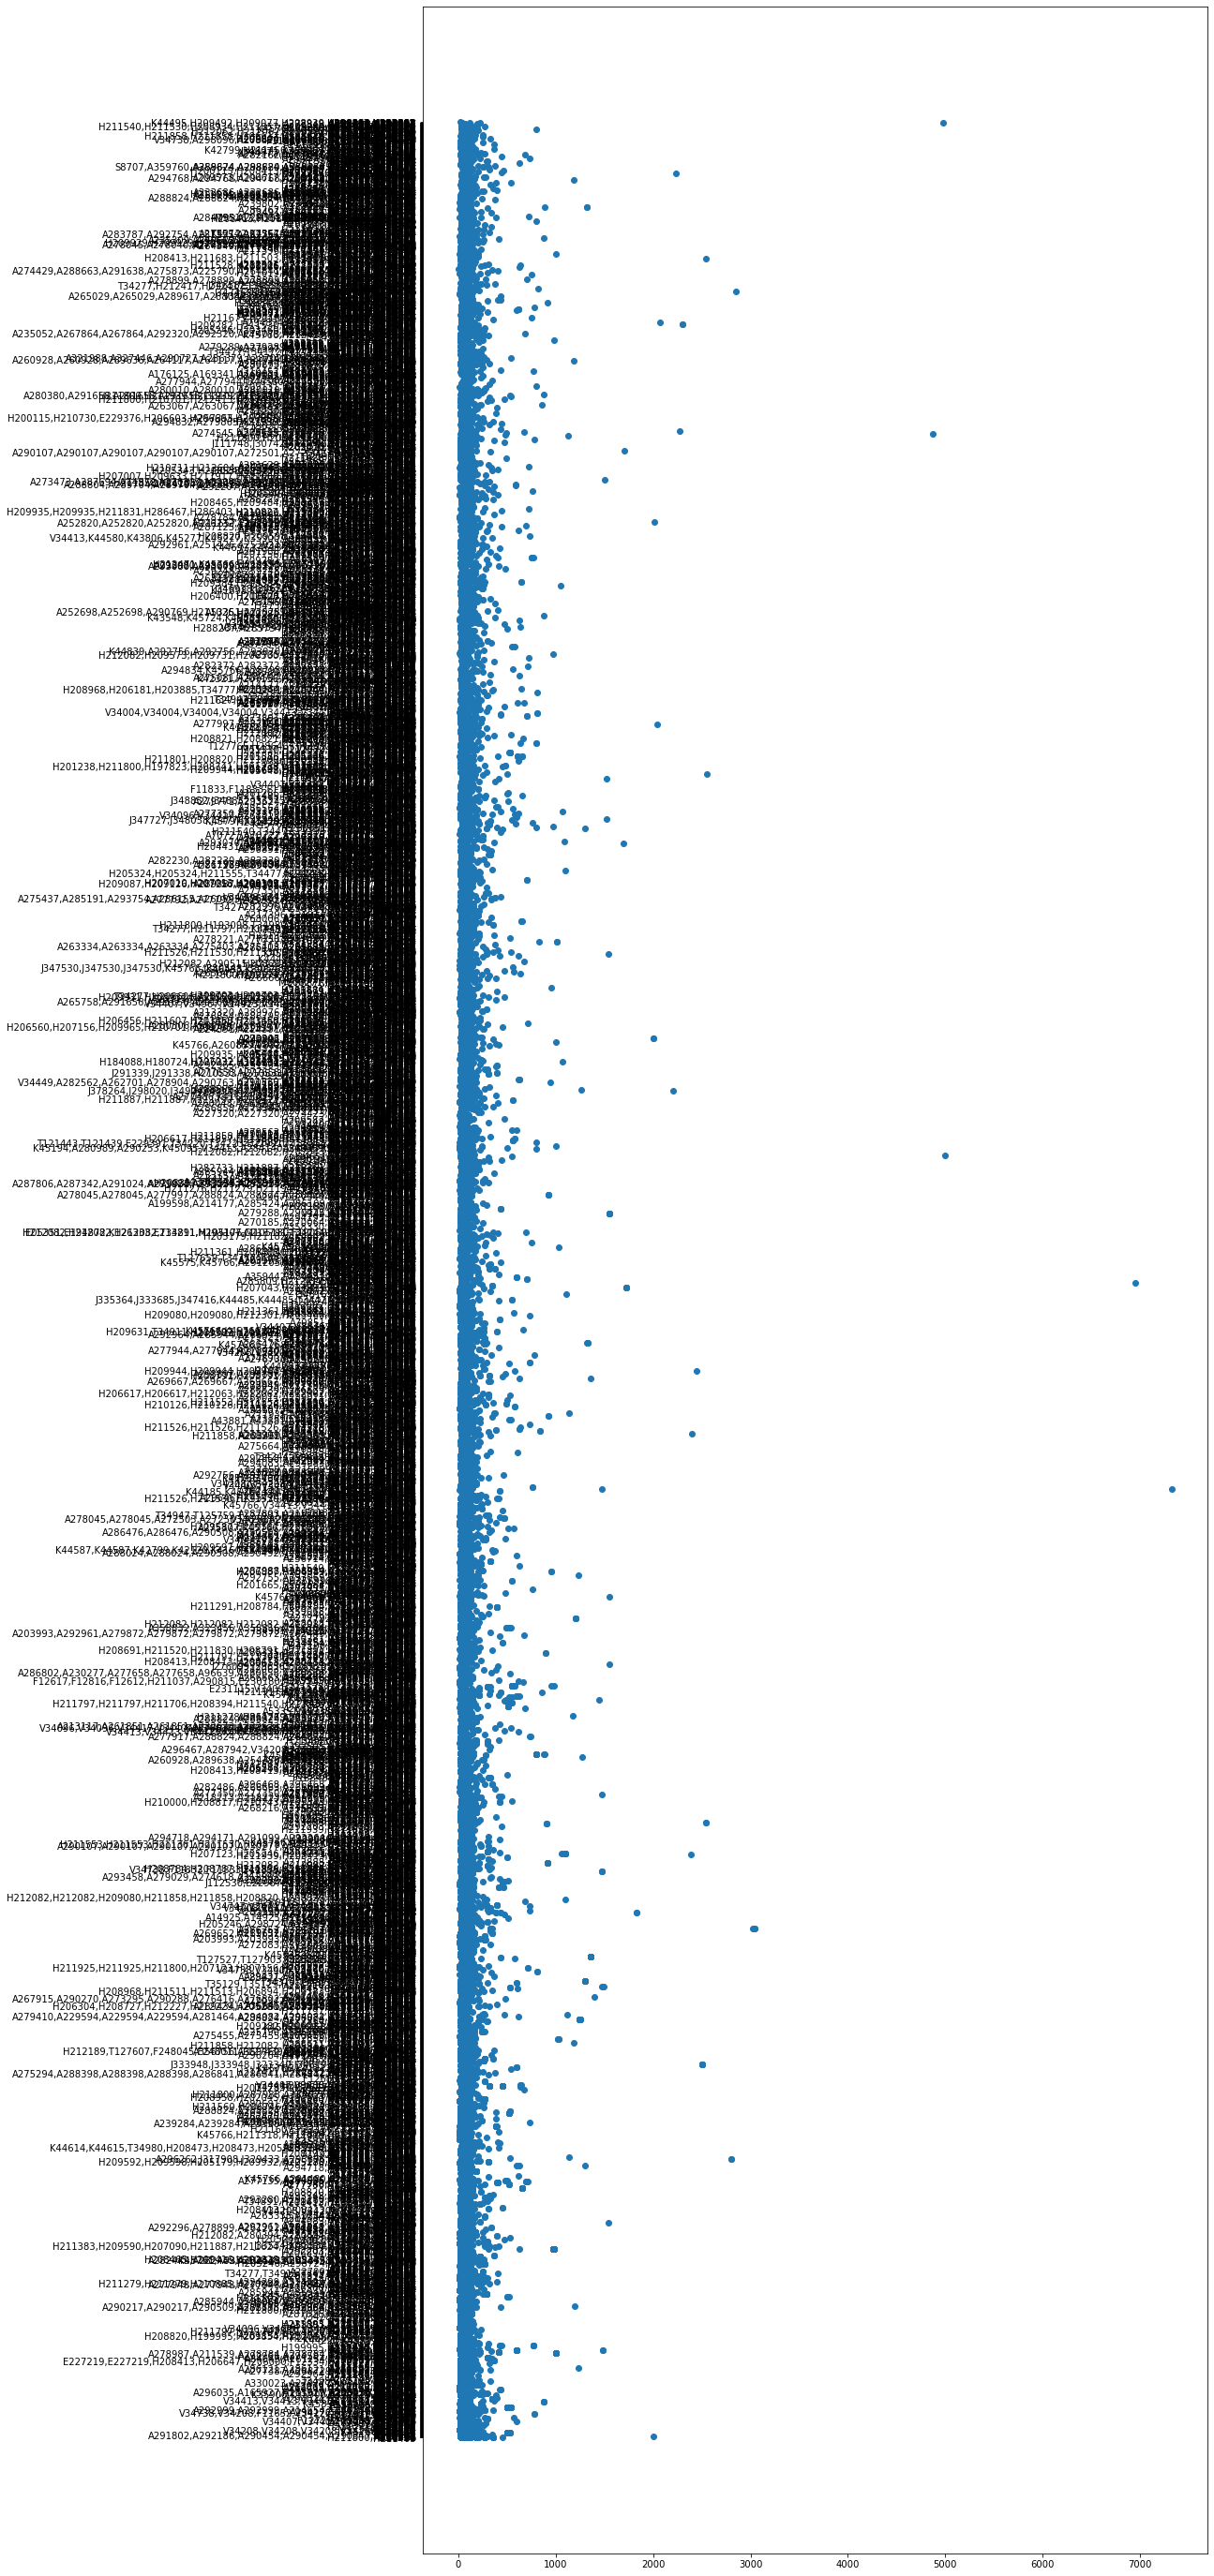

In [145]:
# As you might have noticed, OverAllCartValue seems to the correlated to Products_purchased the most. Let's see a pairplot for area vs price
plt.figure(figsize=[15,50])
plt.scatter(df_train.OverAllCartValue, df_train.Products_purchased)
plt.show()

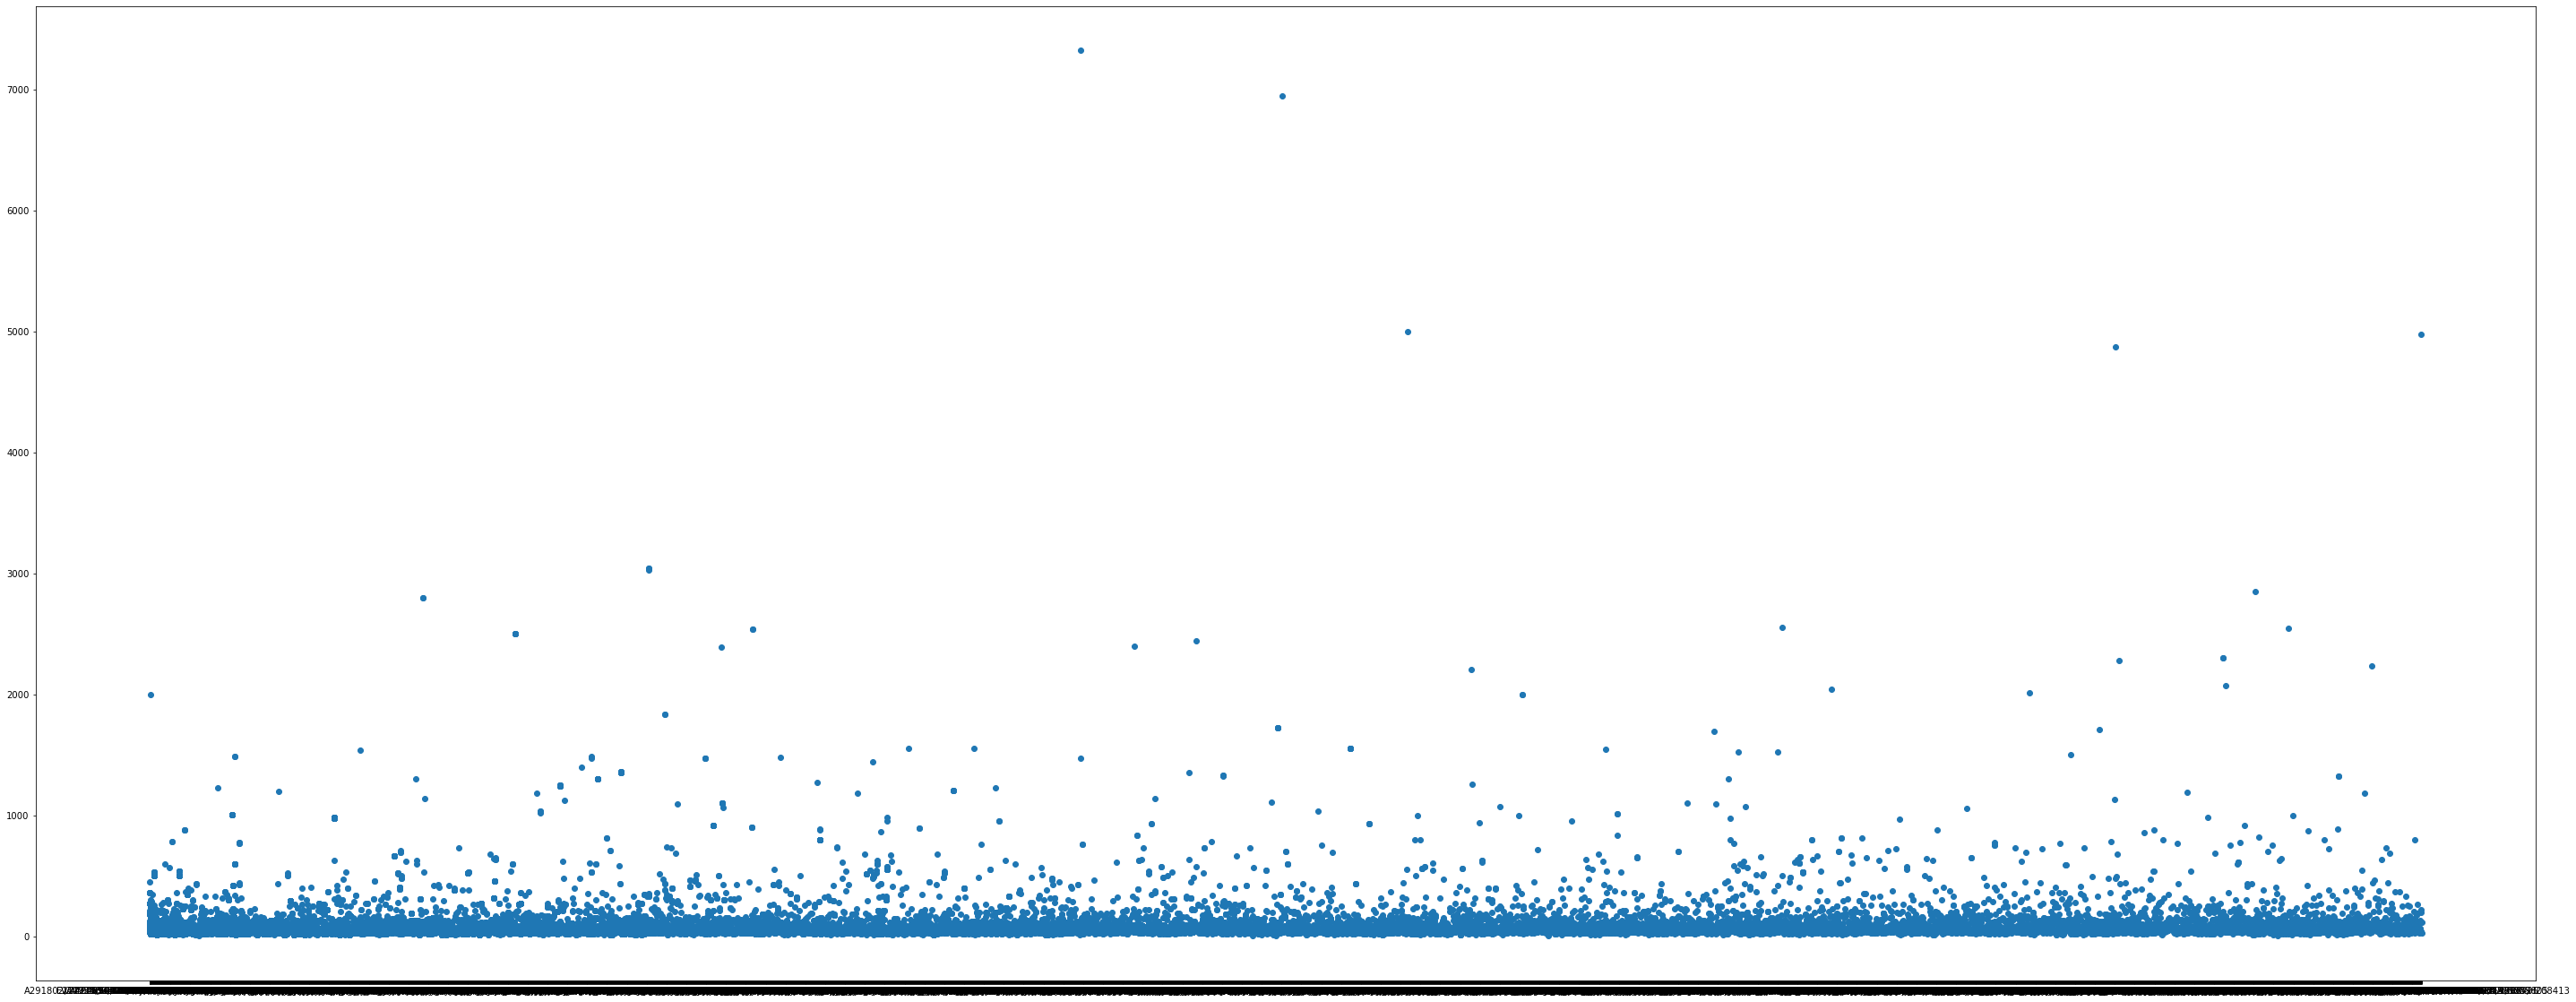

In [348]:
plt.figure(figsize=[50,20])
plt.scatter(df_train.Products_purchased, df_train.OverAllCartValue)
plt.show()

In [176]:
# I am trying to, see what section of the website affects, product purchase and AS A RESULT THE OVERALLCARTVALUE

y_train=df_train.pop('OverAllCartValue')
X_train=df_train

In [177]:
X_train.reset_index(drop=True)

,Timestamp,User_id,Products_purchased,content,default,home,iroa,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete
0,2017-07-26 01:03:44.502,8765298676695519850,H211405,0,0,0,0,0,0,0,0,0,0,0
1,2017-07-26 19:24:36.299,3103341631710766016,K45766,0,0,0,0,0,0,0,0,0,0,0
2,2017-07-26 18:01:14.558,0,A294720,0,0,0,0,0,0,0,0,0,0,0
3,2017-07-26 00:16:29.587,8118245909121144583,"H211800,H211560",0,0,0,0,0,0,0,0,0,0,0
4,2017-07-26 14:58:21.202,7949803911092848572,V34516,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55908,2017-07-26 14:11:29.737,3949499518723453775,"A296467,H212063",0,0,0,0,0,0,0,0,0,0,0
55909,2017-07-26 21:41:06.586,6001192373000747153,A287182,0,0,0,0,0,0,0,0,0,0,0
55910,2017-07-26 23:02:43.41,8421357197565749630,A290113,0,0,0,0,0,0,0,0,0,0,0
55911,2017-07-26 17:04:00.937,7832886628191872345,K45766,0,0,0,0,0,0,0,0,0,0,0


## Step 5: Building a linear model

In [179]:
import numpy as np
import statsmodels.api as sm

X_train_lm1 = sm.add_constant(X_train[['User_id']])  

lr_3 = sm.OLS(y_train, X_train_lm1.astype(float)).fit()

In [180]:
lr_3.params

const      1.881336e-36
User_id    1.154994e-17
dtype: float64

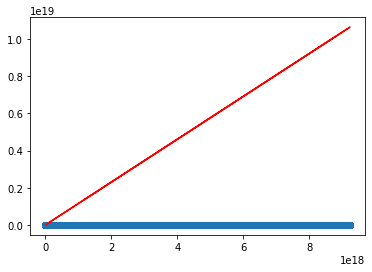

In [181]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm1.iloc[:, 1], y_train)
plt.plot(X_train_lm1.iloc[:, 1], 1.881 + 1.154*X_train_lm1.iloc[:, 1], 'r')
plt.show()

In [184]:
# Print a summary of the linear regression model obtained
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:       OverAllCartValue   R-squared:                      -0.145
Model:                            OLS   Adj. R-squared:                 -0.145
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 20 May 2021   Prob (F-statistic):                nan
Time:                        11:15:01   Log-Likelihood:            -3.5100e+05
No. Observations:               55913   AIC:                         7.020e+05
Df Residuals:                   55912   BIC:                         7.020e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.881e-36   1.93e-38     97.256      0.0

In [185]:
# Assign all the feature variables to X
X_train_lm1 = X_train[['User_id', 'content']]

In [188]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_lm1)

lr_4 = sm.OLS(y_train, X_train_lm1).fit()

lr_4.params

const      3.367407e-36
User_id    1.154994e-17
content    8.913424e-39
dtype: float64

In [190]:
# Check the summary
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:       OverAllCartValue   R-squared:                      -0.145
Model:                            OLS   Adj. R-squared:                 -0.145
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 20 May 2021   Prob (F-statistic):                nan
Time:                        11:15:20   Log-Likelihood:            -3.5100e+05
No. Observations:               55913   AIC:                         7.020e+05
Df Residuals:                   55912   BIC:                         7.020e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.367e-36   3.46e-38     97.256      0.0

In [192]:
# we can see the there is no contribution of this variable in the model, we can drop it later
X_train_lm1 = X_train[['User_id', 'content','default']]

In [195]:
# Build a linear model

import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_lm1)

lr_5 = sm.OLS(y_train, X_train_lm1).fit()

lr_5.params

const      3.367407e-36
User_id    1.154994e-17
content    8.913424e-39
default    8.612295e-39
dtype: float64

In [196]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:       OverAllCartValue   R-squared:                      -0.145
Model:                            OLS   Adj. R-squared:                 -0.145
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 20 May 2021   Prob (F-statistic):                nan
Time:                        11:15:58   Log-Likelihood:            -3.5100e+05
No. Observations:               55913   AIC:                         7.020e+05
Df Residuals:                   55912   BIC:                         7.020e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.367e-36   3.46e-38     97.256      0.0

 We can see the there is no contribution of this two website sections 'content' and 'default' in the model, we can drop them 
 later.
 There is no improvement in the R-square, hence no improvement in the Model
 We will have to keep trying the other sections of the website.

In [197]:
X_train_lm1 = X_train[['User_id','content','default','home']]

In [236]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_lm1)

lr_6= sm.OLS(y_train, X_train_lm1).fit()

lr_6.params

const      3.367407e-36
User_id    1.154994e-17
content    8.913424e-39
default    8.612295e-39
home       1.114178e-38
iroa       6.624842e-39
product    2.896863e-38
dtype: float64

In [237]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:       OverAllCartValue   R-squared:                      -0.145
Model:                            OLS   Adj. R-squared:                 -0.145
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 20 May 2021   Prob (F-statistic):                nan
Time:                        11:34:53   Log-Likelihood:            -3.5100e+05
No. Observations:               55913   AIC:                         7.020e+05
Df Residuals:                   55912   BIC:                         7.020e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.367e-36   3.46e-38     97.256      0.0

In [238]:
X_train_lm1 = X_train[['User_id','content','default','home','iroa']]


In [239]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_lm1)

lr_7 = sm.OLS(y_train, X_train_lm1).fit()

lr_7.params

const      3.367407e-36
User_id    1.154994e-17
content    8.913424e-39
default    8.612295e-39
home       1.114178e-38
iroa       6.624842e-39
dtype: float64

In [240]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:       OverAllCartValue   R-squared:                      -0.145
Model:                            OLS   Adj. R-squared:                 -0.145
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 20 May 2021   Prob (F-statistic):                nan
Time:                        11:35:02   Log-Likelihood:            -3.5100e+05
No. Observations:               55913   AIC:                         7.020e+05
Df Residuals:                   55912   BIC:                         7.020e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.367e-36   3.46e-38     97.256      0.0

In [241]:
X_train_lm1 = X_train[['User_id','content','default','home','iroa','product']]

In [242]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_lm1)

lr_8 = sm.OLS(y_train, X_train_lm1).fit()

lr_8.params

const      3.367407e-36
User_id    1.154994e-17
content    8.913424e-39
default    8.612295e-39
home       1.114178e-38
iroa       6.624842e-39
product    2.896863e-38
dtype: float64

In [243]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:       OverAllCartValue   R-squared:                      -0.145
Model:                            OLS   Adj. R-squared:                 -0.145
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 20 May 2021   Prob (F-statistic):                nan
Time:                        11:35:14   Log-Likelihood:            -3.5100e+05
No. Observations:               55913   AIC:                         7.020e+05
Df Residuals:                   55912   BIC:                         7.020e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.367e-36   3.46e-38     97.256      0.0

In [244]:
X_train_lm1 = X_train[['User_id','content','default','home','iroa','product','product-listing-category']]

In [245]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_lm1)

lr_9 = sm.OLS(y_train, X_train_lm1).fit()

lr_9.params

const                       3.367407e-36
User_id                     1.154994e-17
content                     8.913424e-39
default                     8.612295e-39
home                        1.114178e-38
iroa                        6.624842e-39
product                     2.896863e-38
product-listing-category    1.240652e-38
dtype: float64

In [246]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:       OverAllCartValue   R-squared:                      -0.145
Model:                            OLS   Adj. R-squared:                 -0.145
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 20 May 2021   Prob (F-statistic):                nan
Time:                        11:35:49   Log-Likelihood:            -3.5100e+05
No. Observations:               55913   AIC:                         7.020e+05
Df Residuals:                   55912   BIC:                         7.020e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [247]:
X_train_lm1 = X_train[['User_id','content','default','home','iroa','product','product-listing-category','product-listing-custom']]

In [248]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_lm1)

lr_10 = sm.OLS(y_train, X_train_lm1).fit()

lr_10.params

const                       3.367407e-36
User_id                     1.154994e-17
content                     8.913424e-39
default                     8.612295e-39
home                        1.114178e-38
iroa                        6.624842e-39
product                     2.896863e-38
product-listing-category    1.240652e-38
product-listing-custom      6.022584e-41
dtype: float64

In [249]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:       OverAllCartValue   R-squared:                      -0.145
Model:                            OLS   Adj. R-squared:                 -0.145
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 20 May 2021   Prob (F-statistic):                nan
Time:                        11:35:57   Log-Likelihood:            -3.5100e+05
No. Observations:               55913   AIC:                         7.020e+05
Df Residuals:                   55912   BIC:                         7.020e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [250]:
X_train_lm1 = X_train[['User_id','content','default','home','iroa','product','product-listing-category','product-listing-custom','product-listing-search','productNotFound']]

In [251]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_lm1)

lr_11 = sm.OLS(y_train, X_train_lm1).fit()

lr_11.params

const                       3.367407e-36
User_id                     1.154994e-17
content                     8.913424e-39
default                     8.612295e-39
home                        1.114178e-38
iroa                        6.624842e-39
product                     2.896863e-38
product-listing-category    1.240652e-38
product-listing-custom      6.022584e-41
product-listing-search      4.215809e-39
productNotFound             6.022584e-41
dtype: float64

In [252]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:       OverAllCartValue   R-squared:                      -0.145
Model:                            OLS   Adj. R-squared:                 -0.145
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 20 May 2021   Prob (F-statistic):                nan
Time:                        11:36:02   Log-Likelihood:            -3.5100e+05
No. Observations:               55913   AIC:                         7.020e+05
Df Residuals:                   55912   BIC:                         7.020e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [253]:
X_train_lm1 = X_train[['User_id','content','default','home','iroa','product','product-listing-category','product-listing-custom','product-listing-search','productNotFound','shoplive']]

In [254]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_lm1)

lr_12 = sm.OLS(y_train, X_train_lm1).fit()

lr_12.params

const                       3.367407e-36
User_id                     1.154994e-17
content                     8.913424e-39
default                     8.612295e-39
home                        1.114178e-38
iroa                        6.624842e-39
product                     2.896863e-38
product-listing-category    1.240652e-38
product-listing-custom      6.022584e-41
product-listing-search      4.215809e-39
productNotFound             6.022584e-41
shoplive                    6.022584e-40
dtype: float64

In [255]:
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:       OverAllCartValue   R-squared:                      -0.145
Model:                            OLS   Adj. R-squared:                 -0.145
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 20 May 2021   Prob (F-statistic):                nan
Time:                        11:36:05   Log-Likelihood:            -3.5100e+05
No. Observations:               55913   AIC:                         7.020e+05
Df Residuals:                   55912   BIC:                         7.020e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [256]:
X_train_lm1 = X_train[['User_id','content','default','home','iroa','product','product-listing-category','product-listing-custom','product-listing-search','productNotFound','shoplive','signupcomplete']]

In [257]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_lm1)

lr_13 = sm.OLS(y_train, X_train_lm1).fit()

lr_13.params

const                       3.367407e-36
User_id                     1.154994e-17
content                     8.913424e-39
default                     8.612295e-39
home                        1.114178e-38
iroa                        6.624842e-39
product                     2.896863e-38
product-listing-category    1.240652e-38
product-listing-custom      6.022584e-41
product-listing-search      4.215809e-39
productNotFound             6.022584e-41
shoplive                    6.022584e-40
signupcomplete              0.000000e+00
dtype: float64

In [258]:
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:       OverAllCartValue   R-squared:                      -0.145
Model:                            OLS   Adj. R-squared:                 -0.145
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 20 May 2021   Prob (F-statistic):                nan
Time:                        11:36:12   Log-Likelihood:            -3.5100e+05
No. Observations:               55913   AIC:                         7.020e+05
Df Residuals:                   55912   BIC:                         7.020e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [259]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [260]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm1.values, i) for i in range(X_train_lm1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,User_id,1.03
2,content,1.00
3,default,1.00
4,home,1.00
5,iroa,1.00
7,product-listing-category,1.00
8,product-listing-custom,1.00
9,product-listing-search,1.00
10,productNotFound,1.00
11,shoplive,1.00


## VIF =1 , which means that multicollinearity does not exist.

Dividing into X_test and y_test

In [476]:
y_test = df_test.pop('OverAllCartValue')
X_test = df_test

In [262]:
X_test

,Timestamp,User_id,Products_purchased,content,default,home,iroa,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete
61069,2017-07-26 22:53:10.395,4674891383235482200,"A290149,A290149",0,0,0,0,0,0,0,0,0,0,0
50051,2017-07-26 23:02:07.639,1137788534962597613,K45766,0,0,0,0,0,0,0,0,0,0,0
29642,2017-07-26 05:35:41.25,0,A293532,0,0,0,0,0,0,0,0,0,0,0
71188,2017-07-26 20:37:54.701,7520027843280158681,A293532,0,0,0,0,0,0,0,0,0,0,0
22997,2017-07-26 02:21:39.742,2848264493764806548,H211397,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51573,2017-07-26 11:03:29.122,6749369003990492495,F12422,0,0,0,0,0,0,0,0,0,0,0
20448,2017-07-26 01:22:58.803,4153167019502470662,A273676,0,0,0,0,0,0,0,0,0,0,0
55348,2017-07-26 16:10:23.535,6679844544602269997,A272787,0,0,0,0,0,0,0,0,0,0,0
79948,2017-07-26 23:33:00.129,8369154629829622874,K45819,0,0,0,0,0,0,0,0,0,0,0


In [264]:
# Adding constant variable to test dataframe, so we will be dropping columns with p-value less than 0.5,
# they are User_id, content, home, default, product,signup
X_test_m4 = sm.add_constant(X_test)
X_test_m4 = X_test_m4.drop(["Timestamp","Products_purchased"], axis = 1)


In [265]:
X_test_m4

,const,User_id,content,default,home,iroa,product,product-listing-category,product-listing-custom,product-listing-search,productNotFound,shoplive,signupcomplete
61069,1.0,4674891383235482200,0,0,0,0,0,0,0,0,0,0,0
50051,1.0,1137788534962597613,0,0,0,0,0,0,0,0,0,0,0
29642,1.0,0,0,0,0,0,0,0,0,0,0,0,0
71188,1.0,7520027843280158681,0,0,0,0,0,0,0,0,0,0,0
22997,1.0,2848264493764806548,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51573,1.0,6749369003990492495,0,0,0,0,0,0,0,0,0,0,0
20448,1.0,4153167019502470662,0,0,0,0,0,0,0,0,0,0,0
55348,1.0,6679844544602269997,0,0,0,0,0,0,0,0,0,0,0
79948,1.0,8369154629829622874,0,0,0,0,0,0,0,0,0,0,0


In [266]:
y_pred_m4= lr_13.predict(X_test_m4)

In [267]:
# Step 7: Model Evaluation
# Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

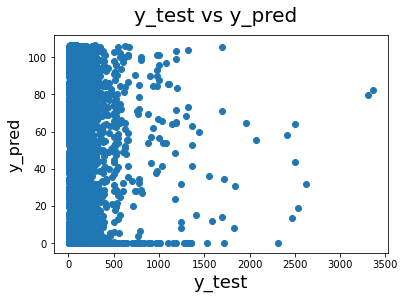

In [268]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

We can see that the equation of our best fitted line is:

OverAllCartValue= 1.155 X User_id + 8.913 X content + 8.612 X default + 1.114 X home + 6.625 X iroa + 2.897 X product + 1.241 X product-listing-category + 6.023 X product-listing-custom + 4.216 X  product-listing-search + 6.023 X productNotfound + 6.023 X shoplive

## Assumptions
### Residual Analysis of the train data
### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [273]:
y_train_pro = lr_13.predict(X_train_lm1)

Text(0.5, 0, 'Errors')

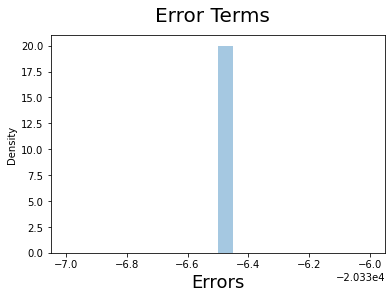

In [276]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pro), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Text(0.5, 0, 'Errors')

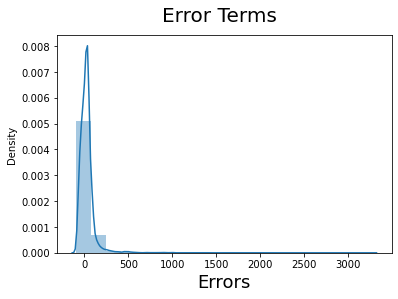

In [277]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test-y_pred_m4), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

<AxesSubplot:xlabel='OverAllCartValue'>

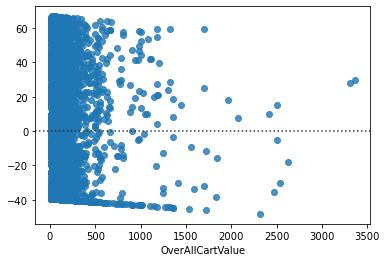

In [278]:
# Homoscedasticity Assumption
#on test data
sns.residplot(y_test,y_pred_m4)

In [279]:
## No Autocorrelation of the Error Terms
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(y_test-y_pred_m4)
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.8581822250898365
Little to no autocorrelation 

Assumption satisfied
